In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
np.random.seed(0)

In [0]:
def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3), size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)

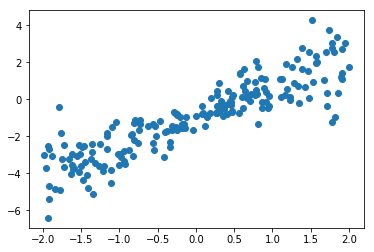

In [5]:
x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

In [0]:
epoch=100
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.summary()
model.compile(optimizer='sgd', loss='mse')

callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', 
                    monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(patience=5)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, epochs=100, 
                    validation_split=0.2, callbacks=callback_list)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 690us/sample - loss: 4.6874 - val_loss: 2.4212
Epoch 2/100
120/120 [==============================] - 0s 108us/sample - loss: 3.9868 - val_loss: 2.0687
Epoch 3/100
120/120 [==============================] - 0s 96us/sample - loss: 3.4061 - val_loss: 1.7851
Epoch 4/100
120/120 [==============================] - 0s 94us/sample - loss: 2.9323 - val_loss: 1.5621
Epoch 5/100
120/120 [==============================] - 0s 95us/sample - loss: 2.5511 - val_loss: 1.3834
Epoch 6/100
120/120 [==============================] - 0s 102us/sample - loss: 2.2308 - val_loss: 1.2428
Epoch 7/100
120/120 [==============================] - 0s 99us/sample - loss: 1.9743 - val_loss: 1.1312
Epoch 8/100
120/120 [==============================] - 0s 89us/sample - loss: 1.7605 - val_loss: 1.0414
Epoch 9/100
120/120 [==============================] - 0s 92us/sample - loss: 1.5856 - val_loss: 0.9729
Epoch 10/100
120

In [9]:
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 415us/sample - loss: 0.9692


0.9691565108299255

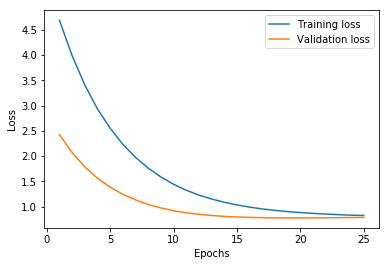

In [10]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

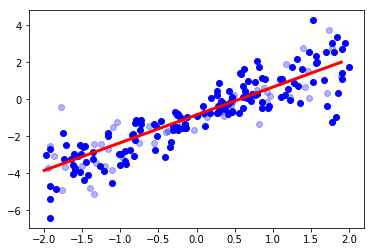

In [11]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()
